In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
data = pd.read_csv('data_with_clusters.csv')
data.drop('Unnamed: 0', axis = 1, inplace=True)
data.head()

,pays,acces_ens_secondaire,ados_non-scol,enfants_non-scol,inscriptions_ens_sup,inscriptions_primaire,inscriptions_préscol,inscriptions_secondaire,ratio_ens_sup,ratio_primaire,...,pop_active_avec_diplome,tx_emploi_15+,tx_actifs_15-24,epargne_brute(PIB),epargne_interieure_brute,cluster_km,cluster_km_2,cluster_km_5,cluster_ddg,cluster_db
0,Afghanistan,89.783073,7.781353,3.996940,4.619342,94.895554,3.080470,39.700971,0.294833,0.599088,...,49.745001,49.372499,45.339999,20.896559,19.719900,2,1,3,1,-1
1,Afrique du Sud,96.816158,13.785806,7.176252,20.994972,104.268580,22.914647,94.457259,1.296527,0.963646,...,43.265556,38.091579,27.254737,16.371788,19.719900,3,0,4,3,-1
2,Albanie,98.833753,4.755447,6.472873,41.650427,100.335247,66.300319,86.715374,1.308677,1.016700,...,45.808462,47.963571,34.666428,21.311708,9.391536,3,0,2,2,0
3,Algérie,96.591529,7.781353,2.718592,29.798487,111.345440,35.694609,80.699898,1.299649,0.938633,...,52.174000,34.886250,25.401429,47.290134,45.964392,3,0,4,3,0
4,Allemagne,99.627867,2.639915,2.280481,67.467917,102.896194,108.693307,101.335926,0.985777,0.995832,...,38.054737,55.450000,50.402631,26.247102,26.142249,0,0,1,2,0


## Analyse des groupes obtenus par K-Means

### Avec K = 2

In [3]:
data.groupby(['cluster_km_2']).describe().T

cluster_km_2                         0          1
acces_ens_secondaire count  142.000000  62.000000
                     mean    96.714190  81.870284
                     std      4.015573  13.311652
                     min     66.812782  42.735290
                     25%     96.194705  74.062186
...                                ...        ...
cluster_db           min     -1.000000  -1.000000
                     25%      0.000000  -1.000000
                     50%      0.000000   0.000000
                     75%      0.000000   0.000000
                     max      0.000000   2.000000

[240 rows x 2 columns]

In [4]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

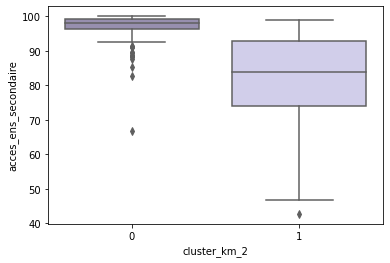

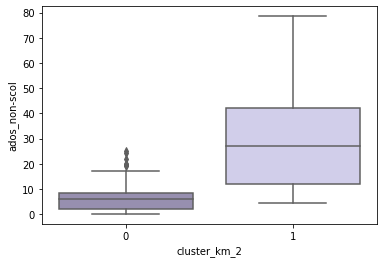

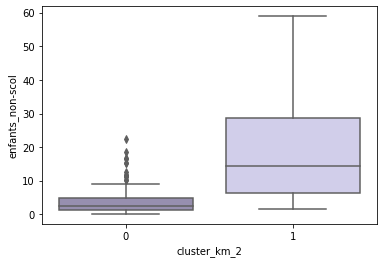

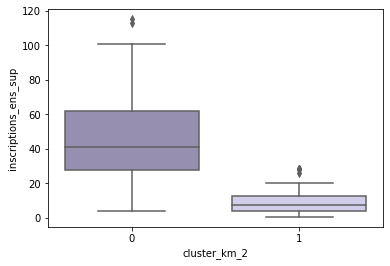

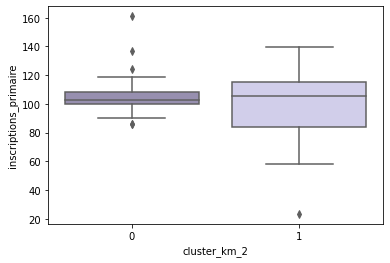

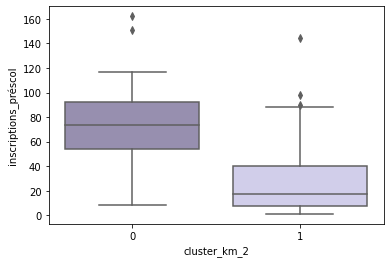

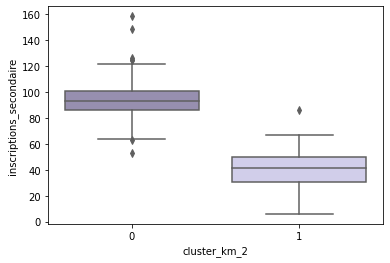

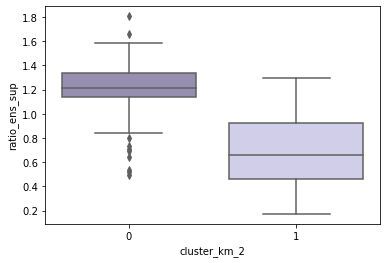

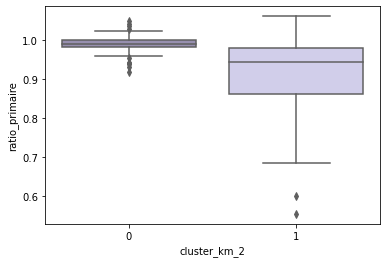

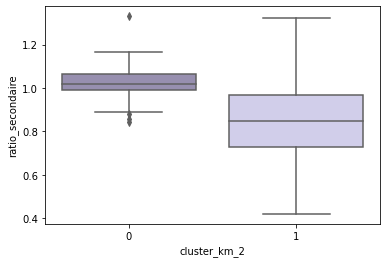

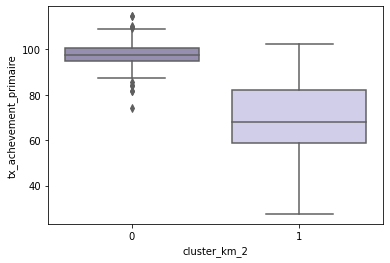

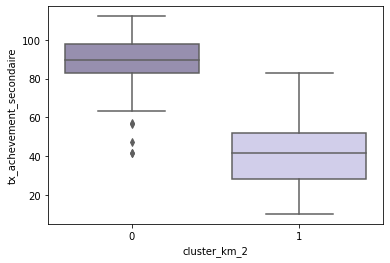

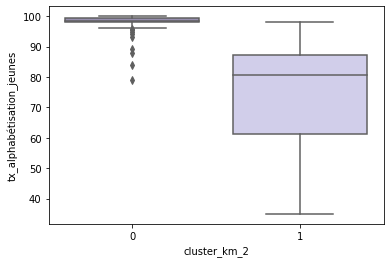

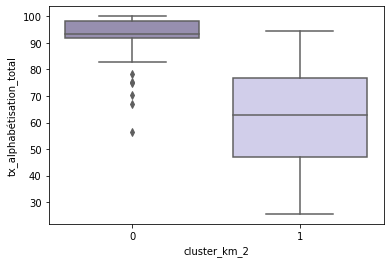

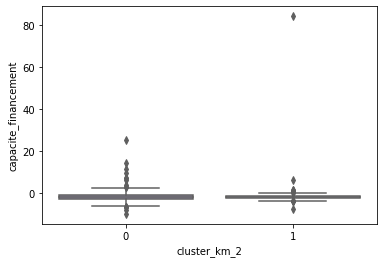

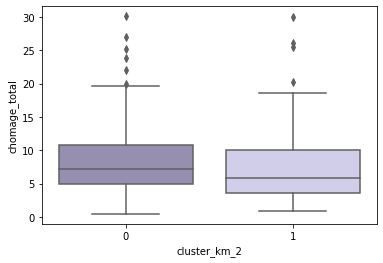

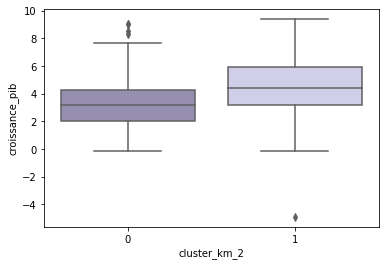

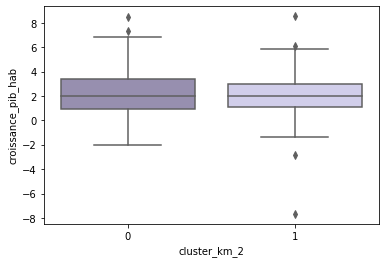

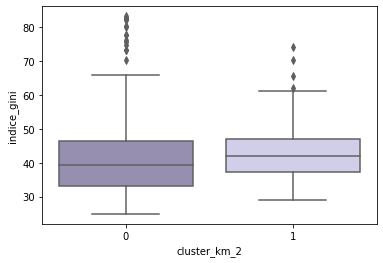

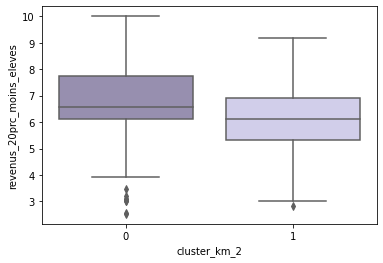

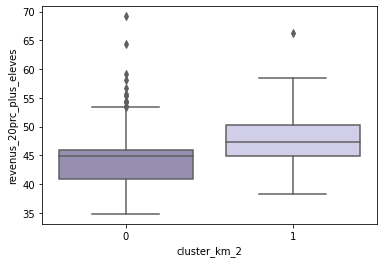

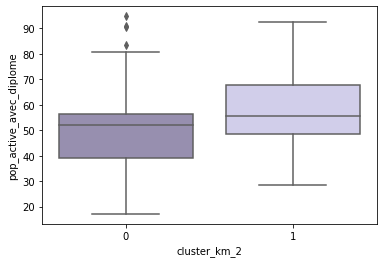

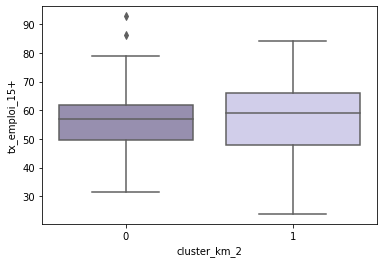

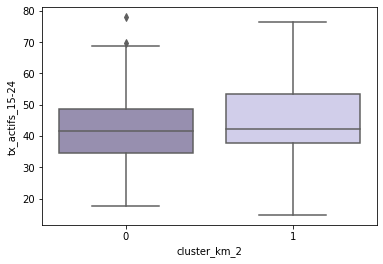

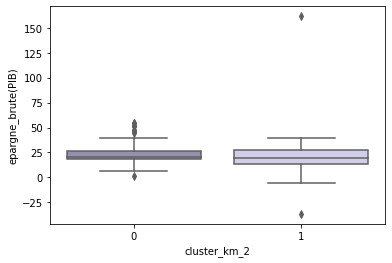

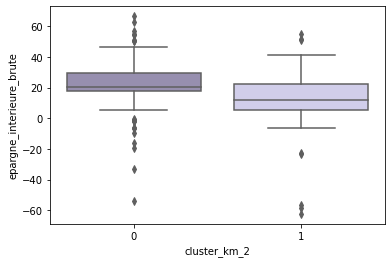

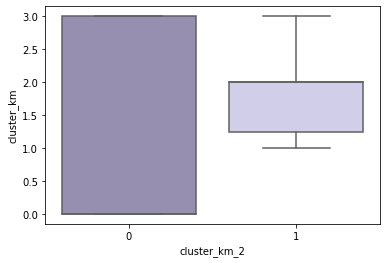

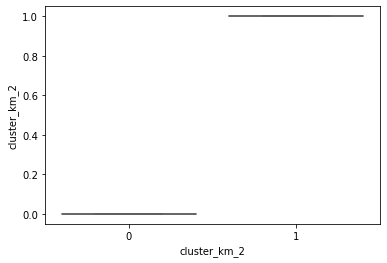

In [5]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#cdc9ef"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_2', y = i, data = data)
    plt.show()

In [6]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=72.71127302368986, pvalue=1.5007441171111883e-17)
Test de Student : Ttest_indResult(statistic=7.498349889501587, pvalue=3.382446862421501e-11)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=16.913266714815663, pvalue=3.91271619393615e-05)
Test de Student : Ttest_indResult(statistic=-9.466671609167289, pvalue=2.2809611307929686e-15)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.917187670351076, pvalue=5.7508411171014375e-09)
Test de Student : Ttest_indResult(statistic=-7.647766494474337, pvalue=1.6509481720743203e-11)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=21.017593534517143, pvalue=4.550851833710599e-06)
Test de Student : Ttest_indResult(statistic=7.459293428515474, pvalue=4.077843362139943e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=89.97109492238327, pvalue=2.416650189433552e-21)
Test de Student : Ttest_indResult(statistic=0.59031848953968

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 4

In [7]:
data.groupby(['cluster_km']).describe().T

cluster_km                          0          1          2          3
acces_ens_secondaire count  76.000000  21.000000  40.000000  67.000000
                     mean   97.217691  85.262064  79.666848  96.173893
                     std     3.308949  12.554963  13.421844   4.484127
                     min    82.765400  46.650085  42.735290  67.714246
                     25%    96.269669  79.912117  71.663175  95.235958
...                               ...        ...        ...        ...
cluster_db           min    -1.000000  -1.000000  -1.000000  -1.000000
                     25%     0.000000  -1.000000  -1.000000   0.000000
                     50%     0.000000   0.000000   0.000000   0.000000
                     75%     0.000000   0.000000   1.000000   0.000000
                     max     0.000000   0.000000   2.000000   0.000000

[240 rows x 4 columns]

In [8]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

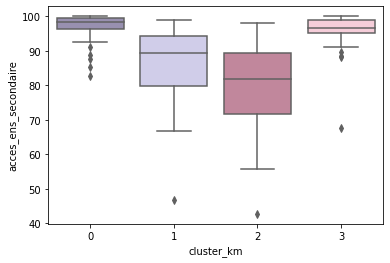

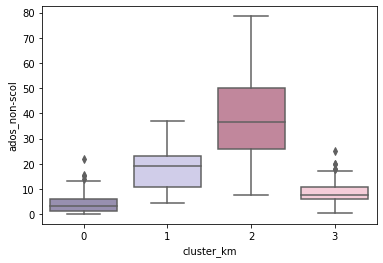

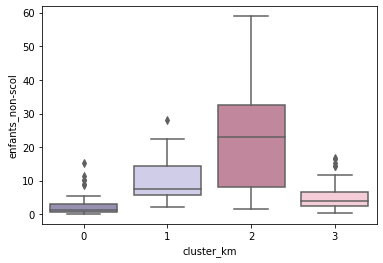

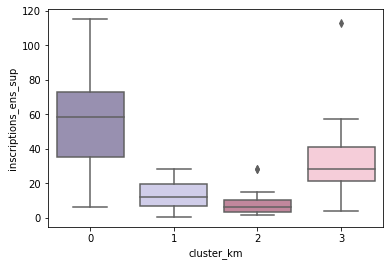

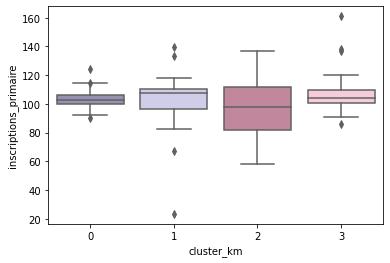

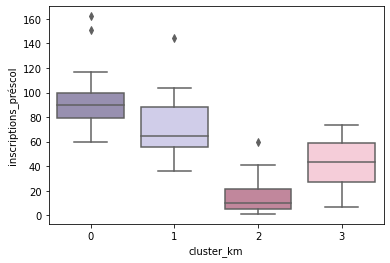

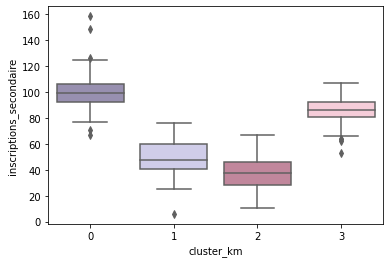

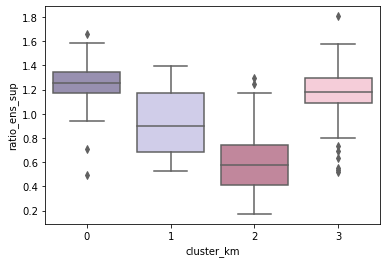

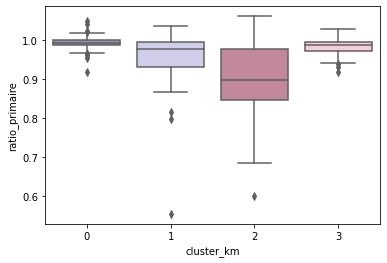

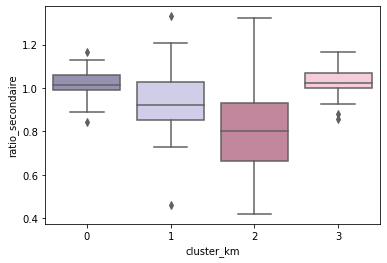

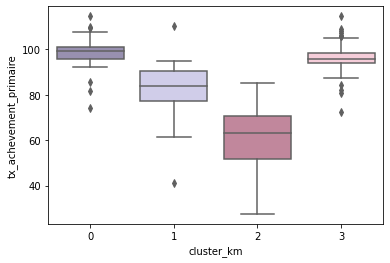

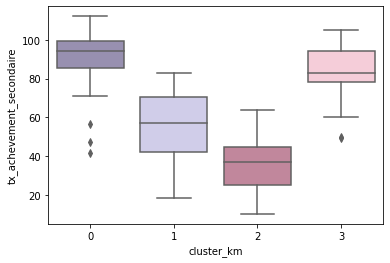

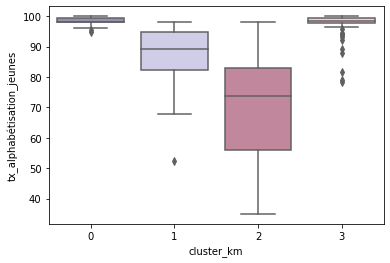

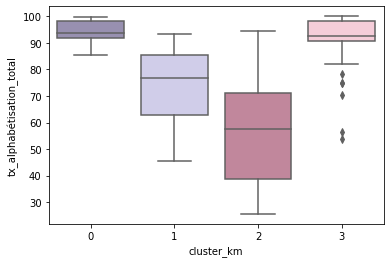

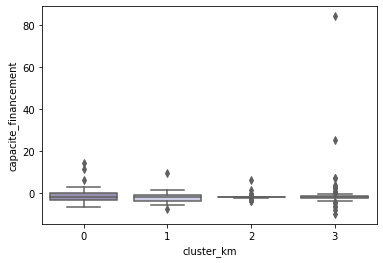

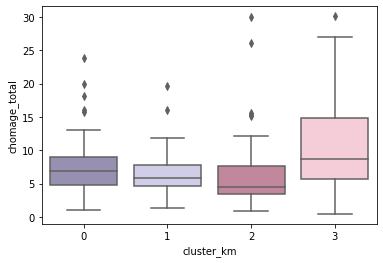

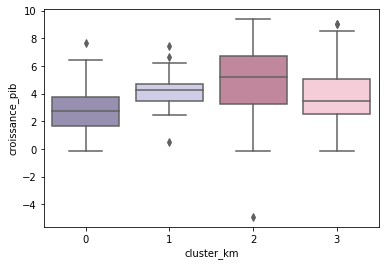

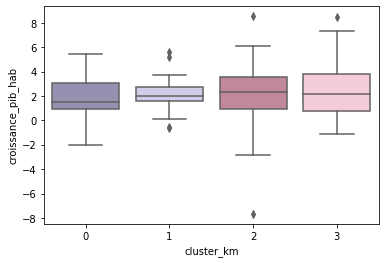

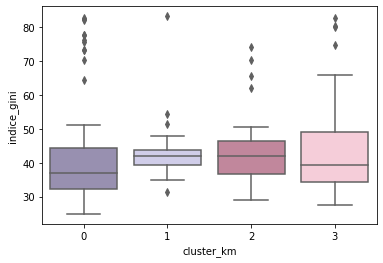

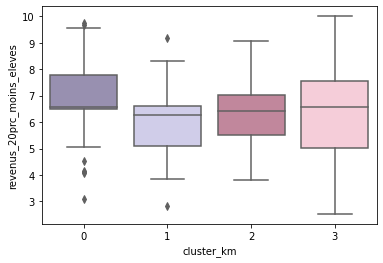

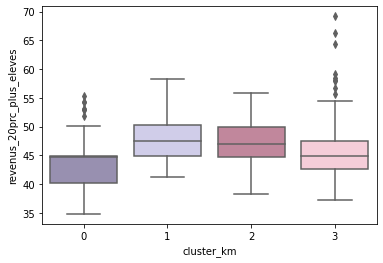

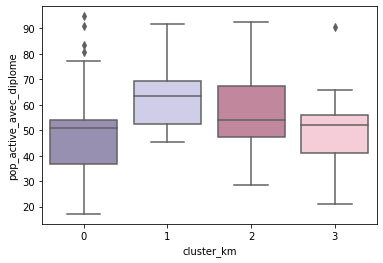

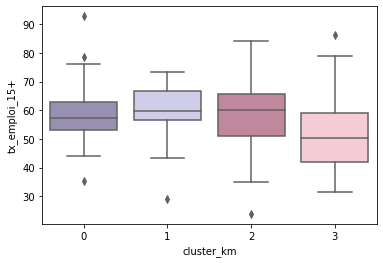

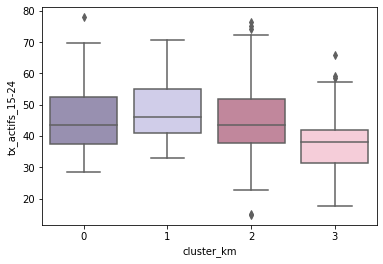

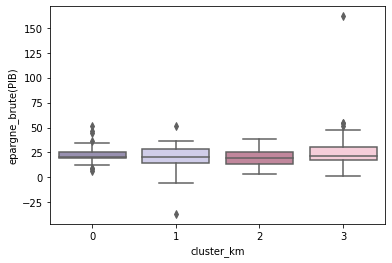

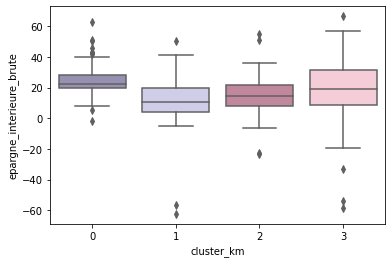

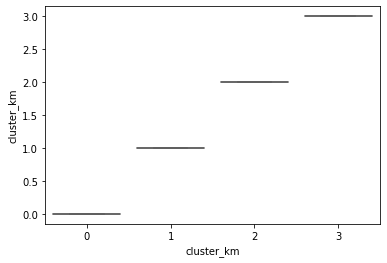

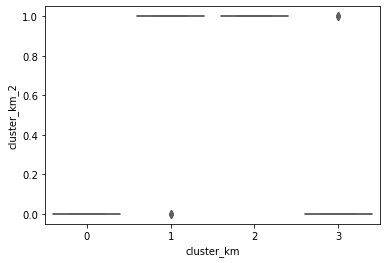

In [9]:
# Create an array with the colors you want to use
colors = ["#958bb5", "#ccc8ee","#cb7d9a", "#fbc7d6"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km', y = i, data = data)
    plt.show()

In [10]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=72.71127302368986, pvalue=1.5007441171111883e-17)
Test de Welsch : Ttest_indResult(statistic=4.322532286213019, pvalue=0.00030695901082370363)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=16.913266714815663, pvalue=3.91271619393615e-05)
Test de Welsch : Ttest_indResult(statistic=-6.684148383775718, pvalue=8.095946931948935e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.917187670351076, pvalue=5.7508411171014375e-09)
Test de Welsch : Ttest_indResult(statistic=-4.898053658777746, pvalue=6.929719146215959e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=21.017593534517143, pvalue=4.550851833710599e-06)
Test de Welsch : Ttest_indResult(statistic=11.928340984507802, pvalue=4.189166049642869e-20)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=89.97109492238327, pvalue=2.416650189433552e-21)
Test de Welsch : Ttest_indResult(statistic=0.33174958490945755, 

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [11]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=99.35885561264804, pvalue=2.106538110901798e-23)
Test de Welsch : Ttest_indResult(statistic=8.141009086341338, pvalue=3.877019296249115e-10)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=108.88801135719496, pvalue=1.7171886673713799e-25)
Test de Welsch : Ttest_indResult(statistic=-10.771093391172764, pvalue=1.5095271649914238e-13)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=134.87107054174678, pvalue=3.5232004155958074e-31)
Test de Welsch : Ttest_indResult(statistic=-8.425468001665529, pvalue=1.9349611060046185e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=64.324486320218, pvalue=1.0552607661140242e-15)
Test de Welsch : Ttest_indResult(statistic=15.829559453063043, pvalue=7.0438171311201575e-28)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=82.50432308497034, pvalue=1.0543927139831517e-19)
Test de Welsch : Ttest_indResult(statistic=2.051625376978822,

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [12]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=6.4238820969548005, pvalue=0.011259576346466097)
Test de Welsch : Ttest_indResult(statistic=1.5661666641662284, pvalue=0.11993853285577778)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=0.6515948565287961, pvalue=0.4195430532479655)
Test de Welsch : Ttest_indResult(statistic=-5.284844749540457, pvalue=4.952609525907221e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=6.978754446816155, pvalue=0.008248299558029826)
Test de Welsch : Ttest_indResult(statistic=-4.641329645695542, pvalue=8.962194841048435e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=10.350883127730443, pvalue=0.0012941275760647367)
Test de Welsch : Ttest_indResult(statistic=6.902568730601242, pvalue=1.9202571292907147e-10)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=34.30208555856596, pvalue=4.718758267664039e-09)
Test de Welsch : Ttest_indResult(statistic=-1.6645773229170615, pvalue=0

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [13]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=0.11389436070410013, pvalue=0.7357532882461828)
Test de Welsch : Ttest_indResult(statistic=1.6145474762919585, pvalue=0.11368667734140539)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.420352279578186, pvalue=0.0002489089513060404)
Test de Welsch : Ttest_indResult(statistic=-5.682641001048294, pvalue=4.5392904698481394e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.785256268805048, pvalue=0.0005970167311370094)
Test de Welsch : Ttest_indResult(statistic=-4.397318929370343, pvalue=4.689200214573183e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.085428551947983, pvalue=0.043254481130241544)
Test de Welsch : Ttest_indResult(statistic=2.8964993547836504, pvalue=0.006981106140700315)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.3571075013316596, pvalue=0.24403940653124956)
Test de Welsch : Ttest_indResult(statistic=0.7604610867965981, pvalue=0

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)



Test de Bartlett : BartlettResult(statistic=2.353571155269411, pvalue=0.12499636769455744)
Test de Welsch : Ttest_indResult(statistic=4.4836495643354075, pvalue=4.008559707246486e-05)
Capacite_financement
Test de Bartlett : BartlettResult(statistic=16.144869268399166, pvalue=5.867730245331179e-05)
Test de Welsch : Ttest_indResult(statistic=0.08819138491475526, pvalue=0.9304363231797097)
Chomage_total
Test de Bartlett : BartlettResult(statistic=2.4965163602265634, pvalue=0.11409843403141472)
Test de Welsch : Ttest_indResult(statistic=0.16307332744700323, pvalue=0.8710818636189117)
Croissance_pib
Test de Bartlett : BartlettResult(statistic=7.045589953716899, pvalue=0.007946064816866385)
Test de Welsch : Ttest_indResult(statistic=-1.2253589037177028, pvalue=0.22534861400862238)
Croissance_pib_hab
Test de Bartlett : BartlettResult(statistic=7.867089960558884, pvalue=0.005034260541637694)
Test de Welsch : Ttest_indResult(statistic=-0.1905036055601929, pvalue=0.8495704911552618)
Indice_gini

In [14]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=39.96413290655833, pvalue=2.586692101840314e-10)
Test de Welsch : Ttest_indResult(statistic=-3.905519059389437, pvalue=0.0007791470930346839)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625634e-06)
Test de Welsch : Ttest_indResult(statistic=-0.7841708151528028, pv

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [15]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=58.28466671085857, pvalue=2.2680493704105466e-14)
Test de Welsch : Ttest_indResult(statistic=-7.531453349220694, pvalue=1.850232997365156e-09)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=87.83387511924614, pvalue=7.118923240985256e-21)
Test de Welsch : Ttest_indResult(statistic=9.390971154929804, pvalue=7.121160295513483e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=85.3762859448759, pvalue=2.466611018166616e-20)
Test de Welsch : Ttest_indResult(statistic=7.242418292869946, pvalue=6.459992949539747e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=37.316168747364976, pvalue=1.0044834981742543e-09)
Test de Welsch : Ttest_indResult(statistic=-10.337647721738172, pvalue=4.9579950159897717e-17)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=14.931158766300284, pvalue=0.00011150604315043825)
Test de Welsch : Ttest_indResult(statistic=-2.660595048659652, p

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 5

In [16]:
data.groupby(['cluster_km_5']).describe().T

cluster_km_5                        0          1          2          3  \
acces_ens_secondaire count  21.000000  52.000000  56.000000  39.000000   
                     mean   85.262064  97.716240  96.706329  79.197417   
                     std    12.554963   3.238028   2.991027  13.260468   
                     min    46.650085  82.765400  87.489100  42.735290   
                     25%    79.912117  96.269669  95.807619  71.628945   
...                               ...        ...        ...        ...   
cluster_db           min    -1.000000  -1.000000  -1.000000  -1.000000   
                     25%    -1.000000   0.000000   0.000000  -1.000000   
                     50%     0.000000   0.000000   0.000000   0.000000   
                     75%     0.000000   0.000000   0.000000   1.000000   
                     max     0.000000   0.000000   0.000000   2.000000   

cluster_km_5                        4  
acces_ens_secondaire count  36.000000  
                     mean   95.371418  
                     std     5.463625  
                     min    67.714246  
                     25%    94.216417  
...                               ...  
cluster_db           min    -1.000000  
                     25%    -0.250000  
                     50%     0.000000  
                     75%     0.000000  
                     max     0.000000  

[240 rows x 5 columns]

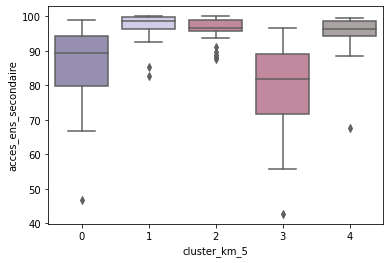

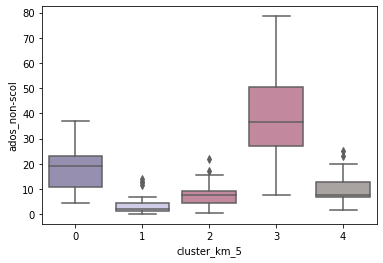

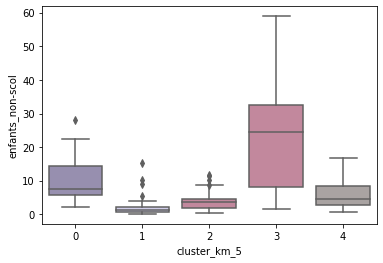

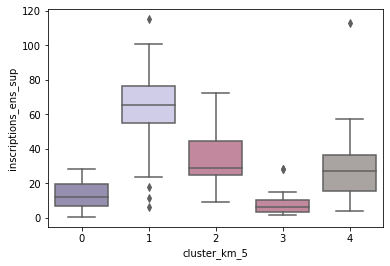

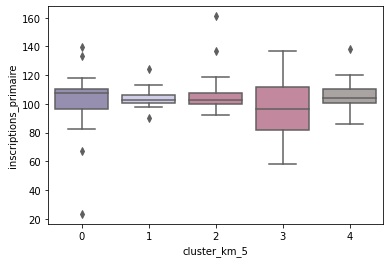

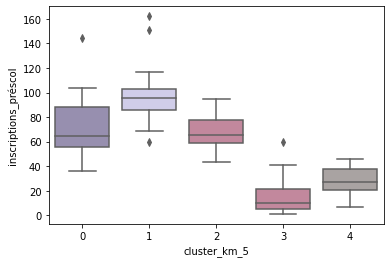

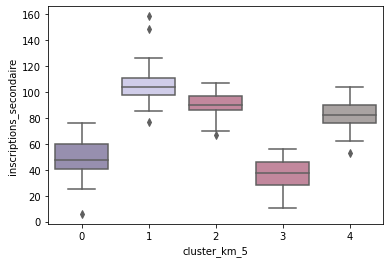

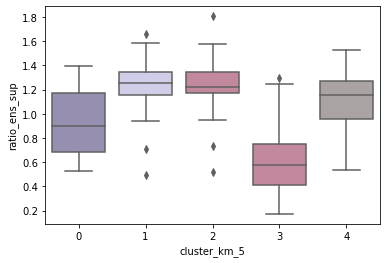

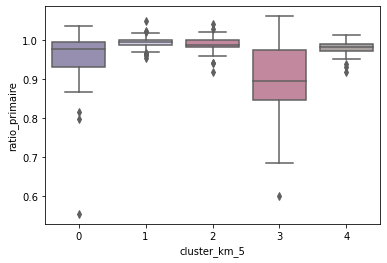

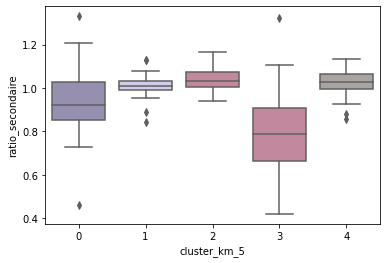

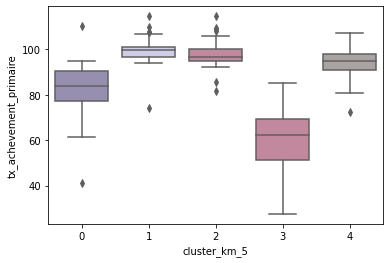

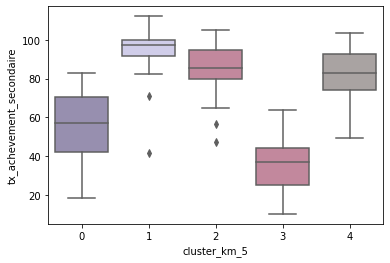

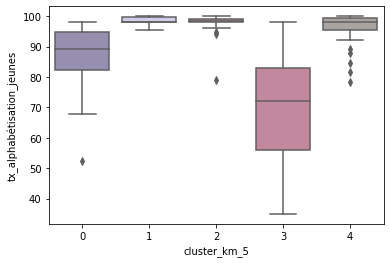

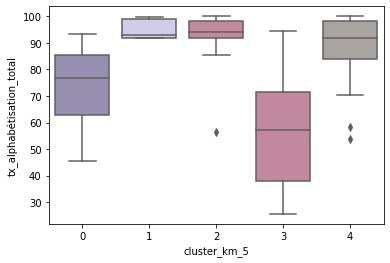

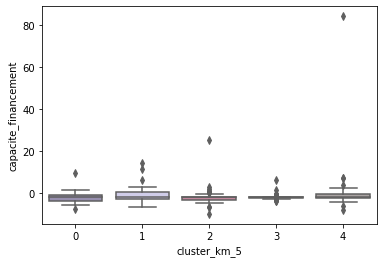

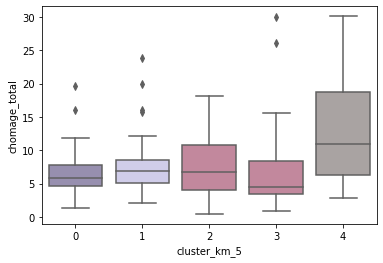

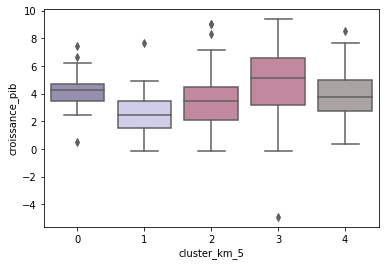

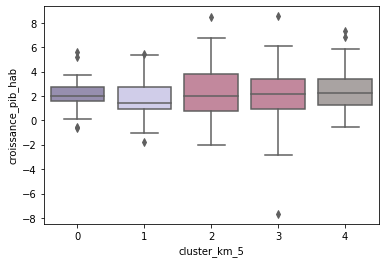

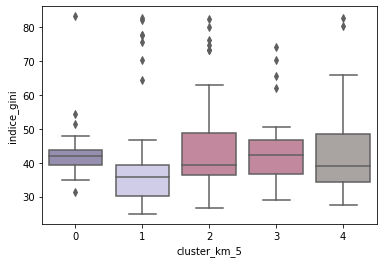

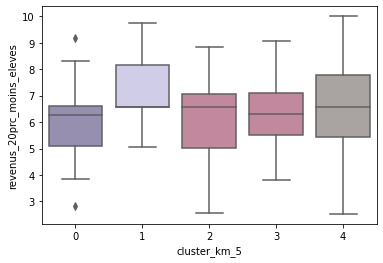

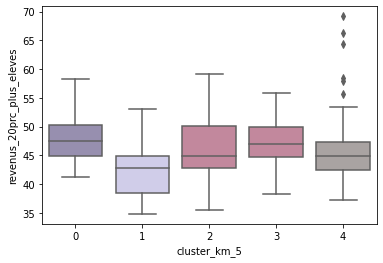

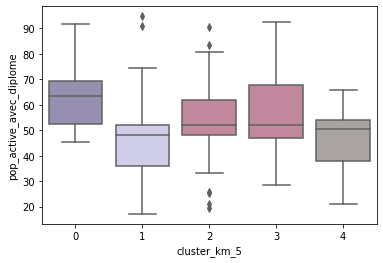

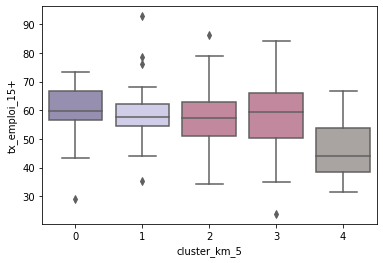

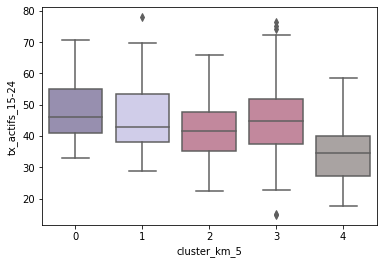

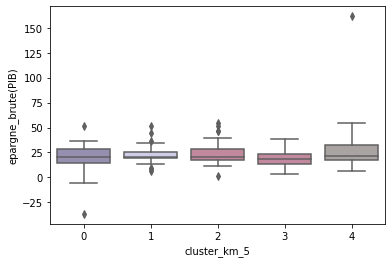

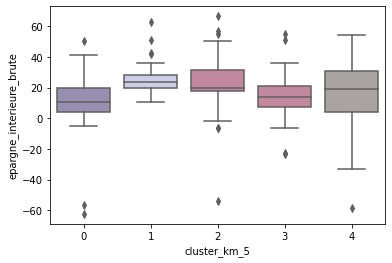

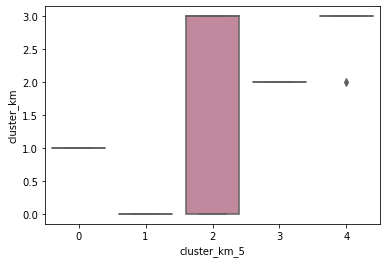

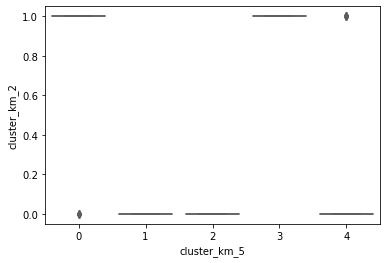

In [17]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#cc7e9b", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_5', y = i, data = data)
    plt.show()

In [18]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=58.31689499330821, pvalue=2.2311973589123918e-14)
Test de Welsch : Ttest_indResult(statistic=-4.485935983192105, pvalue=0.00020161503939474898)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=29.827368078513793, pvalue=4.7227783496490795e-08)
Test de Welsch : Ttest_indResult(statistic=7.415943463032023, pvalue=1.8033078502794512e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=31.071354283908395, pvalue=2.487149408650696e-08)
Test de Welsch : Ttest_indResult(statistic=5.151738854753366, pvalue=3.497712846558394e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=17.630507778868548, pvalue=2.682504707682909e-05)
Test de Welsch : Ttest_indResult(statistic=-13.328638415270586, pvalue=5.275025790527963e-21)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=71.17374743761592, pvalue=3.271117688645844e-17)
Test de Welsch : Ttest_indResult(statistic=-0.3596286813007635

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [19]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=68.29216008806586, pvalue=1.4098037885842033e-16)
Test de Welsch : Ttest_indResult(statistic=-4.13341483234187, pvalue=0.00047800811259713163)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.640804104276159, pvalue=0.00022132262983898398)
Test de Welsch : Ttest_indResult(statistic=5.110770801259523, pvalue=3.036562265848121e-05)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.74141913238976, pvalue=6.294608514281863e-09)
Test de Welsch : Ttest_indResult(statistic=4.083134234412227, pvalue=0.0004896471953390844)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=6.64592864389338, pvalue=0.009938266351099683)
Test de Welsch : Ttest_indResult(statistic=-7.310700878352899, pvalue=6.970886519503864e-10)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=22.800696042471728, pvalue=1.7970061144834746e-06)
Test de Welsch : Ttest_indResult(statistic=-0.6067835016592922, pva

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [20]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=0.07592312743245169, pvalue=0.7829002340179513)
Test de Welsch : Ttest_indResult(statistic=1.7496363522088925, pvalue=0.08730457222356615)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.516140600359675, pvalue=0.0002365203321688394)
Test de Welsch : Ttest_indResult(statistic=-5.711634385605166, pvalue=4.355134495904082e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.995541375524834, pvalue=0.000533279823637301)
Test de Welsch : Ttest_indResult(statistic=-4.396124915340022, pvalue=4.845076021159155e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=3.7741528922856724, pvalue=0.05205025060348829)
Test de Welsch : Ttest_indResult(statistic=2.8958666608639225, pvalue=0.006933463994219062)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.1901765841323704, pvalue=0.27529394007244734)
Test de Welsch : Ttest_indResult(statistic=0.7618943441316344, pvalue=0.4

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [21]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=17.983414100935324, pvalue=2.2283811639339556e-05)
Test de Welsch : Ttest_indResult(statistic=-3.50158003375525, pvalue=0.001796431816802031)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=4.366351036906076, pvalue=0.03665540568688853)
Test de Welsch : Ttest_indResult(statistic=3.51503792337034, pvalue=0.0013980477509730224)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=3.9726244747777706, pvalue=0.04624564074081221)
Test de Welsch : Ttest_indResult(statistic=2.1557453137838962, pvalue=0.039013394087315356)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=12.890117480871806, pvalue=0.00033032169602240286)
Test de Welsch : Ttest_indResult(statistic=-3.8096786635845254, pvalue=0.0003669794719675952)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=22.982014215647602, pvalue=1.6352414712687085e-06)
Test de Welsch : Ttest_indResult(statistic=-0.6661970182305966, pvalu

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [22]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=0.3304095809474579, pvalue=0.5654180114537379)
Test de Welsch : Ttest_indResult(statistic=1.679954736625849, pvalue=0.09598067622718096)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=5.1492166477565595, pvalue=0.023256862632486497)
Test de Welsch : Ttest_indResult(statistic=-5.59478037866462, pvalue=1.9170697370904762e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=0.01865051584813966, pvalue=0.8913731480221374)
Test de Welsch : Ttest_indResult(statistic=-3.3759179342841814, pvalue=0.0010320349504011636)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=8.428665005412096, pvalue=0.0036935141787418895)
Test de Welsch : Ttest_indResult(statistic=7.697143234093023, pvalue=1.920907020518572e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=22.821073604721498, pvalue=1.7780533494085137e-06)
Test de Welsch : Ttest_indResult(statistic=-0.8736103464550146, pvalue=0

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [23]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=74.0538496825591, pvalue=7.601485201148484e-18)
Test de Welsch : Ttest_indResult(statistic=8.532706530945482, pvalue=1.1471111000753814e-10)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=107.27607372914606, pvalue=3.872817994182668e-25)
Test de Welsch : Ttest_indResult(statistic=-11.151517251476951, pvalue=8.569697445793102e-14)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=104.04811807126816, pvalue=1.9746177621237833e-24)
Test de Welsch : Ttest_indResult(statistic=-8.484590928360442, pvalue=1.8493776990356517e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=53.67851976431055, pvalue=2.361308929098078e-13)
Test de Welsch : Ttest_indResult(statistic=16.88509167404635, pvalue=1.2870379770277845e-24)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=64.55687173068101, pvalue=9.378588327250757e-16)
Test de Welsch : Ttest_indResult(statistic=2.0467818182428057, p

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [24]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=11.451605981687738, pvalue=0.0007143223751732248)
Test de Welsch : Ttest_indResult(statistic=2.3094893955116613, pvalue=0.02492224512173391)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=12.613268358072576, pvalue=0.00038301820024474776)
Test de Welsch : Ttest_indResult(statistic=-6.5538776484661225, pvalue=2.7251531752705734e-08)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=14.410226862311127, pvalue=0.00014700180534714993)
Test de Welsch : Ttest_indResult(statistic=-5.036523813259784, pvalue=6.555504328796598e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=0.6920888567680034, pvalue=0.40545479060562717)
Test de Welsch : Ttest_indResult(statistic=7.5870056620398625, pvalue=4.801142002243152e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=13.349125826572037, pvalue=0.00025854311534912876)
Test de Welsch : Ttest_indResult(statistic=-1.0110044243730203

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [25]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=86.21070275898235, pvalue=1.617498858088087e-20)
Test de Welsch : Ttest_indResult(statistic=8.103483536123093, pvalue=5.0404425460581e-10)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=83.04827313152371, pvalue=8.007385848262331e-20)
Test de Welsch : Ttest_indResult(statistic=-9.72472959824988, pvalue=3.402212727158802e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=112.7811299432056, pvalue=2.409582022930588e-26)
Test de Welsch : Ttest_indResult(statistic=-7.795032887272588, pvalue=1.6129929823641294e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=29.25708424220371, pvalue=6.338406580959578e-08)
Test de Welsch : Ttest_indResult(statistic=11.940758442032342, pvalue=2.8180724571158658e-19)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=16.77630208879356, pvalue=4.20552432379275e-05)
Test de Welsch : Ttest_indResult(statistic=2.3220735442426204, pvalue=0

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [26]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=15.81674610011973, pvalue=6.978215795006827e-05)
Test de Welsch : Ttest_indResult(statistic=1.3423447534410058, pvalue=0.185716678954559)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=2.3389286235608893, pvalue=0.12617630719926767)
Test de Welsch : Ttest_indResult(statistic=-2.3741980444276014, pvalue=0.020671581399886257)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=16.03927405565919, pvalue=6.204208226066833e-05)
Test de Welsch : Ttest_indResult(statistic=-3.1163632082159145, pvalue=0.003073464184644979)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=3.2456463081165725, pvalue=0.07161344123461043)
Test de Welsch : Ttest_indResult(statistic=1.5161195276602917, pvalue=0.13469122682151316)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=0.6385654893712172, pvalue=0.42423073206415507)
Test de Welsch : Ttest_indResult(statistic=-0.16595154051092093, pvalue=0.868

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [27]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 3][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=24.674014445498305, pvalue=6.789345019256592e-07)
Test de Welsch : Ttest_indResult(statistic=-7.000539515392878, pvalue=5.2395587860526985e-09)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=43.020474033810444, pvalue=5.416999549387322e-11)
Test de Welsch : Ttest_indResult(statistic=8.649909279196988, pvalue=3.964004257327866e-11)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=38.8193323648785, pvalue=4.649006907821916e-10)
Test de Welsch : Ttest_indResult(statistic=6.416930145411573, pvalue=6.792403726253051e-08)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=42.112957670486416, pvalue=8.615045098175076e-11)
Test de Welsch : Ttest_indResult(statistic=-6.066142976629967, pvalue=3.4322705872062716e-07)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=17.545589682053848, pvalue=2.8050063412122108e-05)
Test de Welsch : Ttest_indResult(statistic=-2.381078609565723, p

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


## Analyse des groupes obtenus par la CAH

In [28]:
data.groupby(['cluster_ddg']).describe().T

cluster_ddg                         1          2          3
acces_ens_secondaire count  53.000000  87.000000  64.000000
                     mean   80.835827  97.647282  94.215002
                     std    13.693033   2.890863   6.219964
                     min    42.735290  85.374960  66.812782
                     25%    72.008942  96.269669  93.681983
...                               ...        ...        ...
cluster_db           min    -1.000000  -1.000000  -1.000000
                     25%    -1.000000   0.000000   0.000000
                     50%     0.000000   0.000000   0.000000
                     75%     0.000000   0.000000   0.000000
                     max     2.000000   0.000000   0.000000

[240 rows x 3 columns]

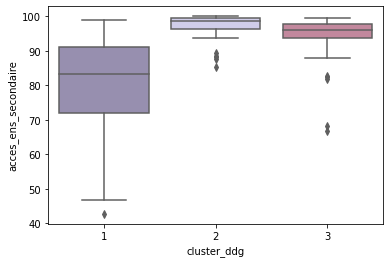

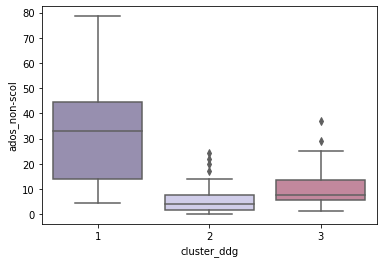

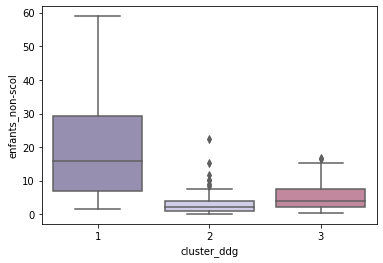

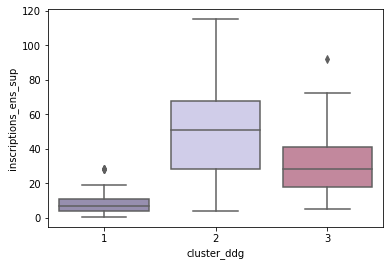

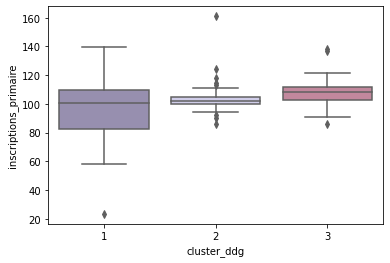

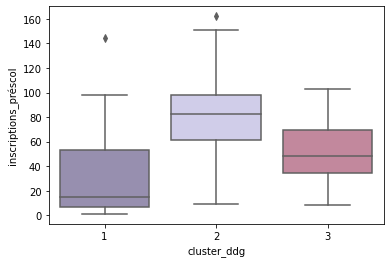

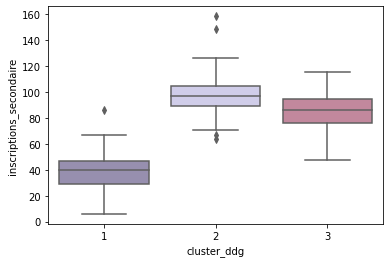

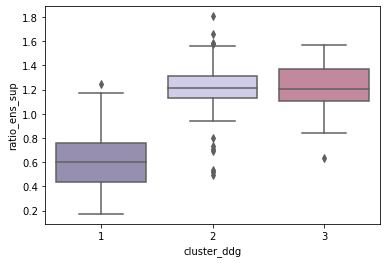

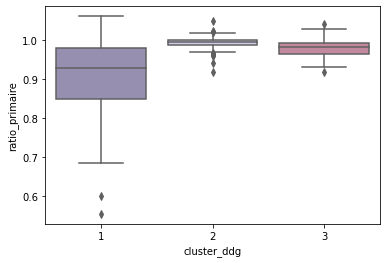

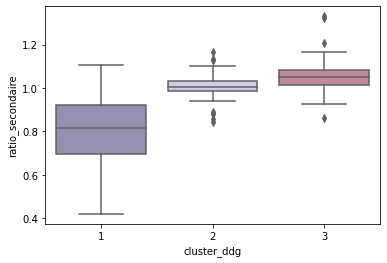

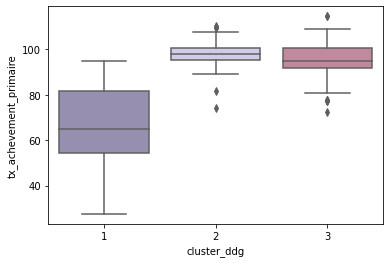

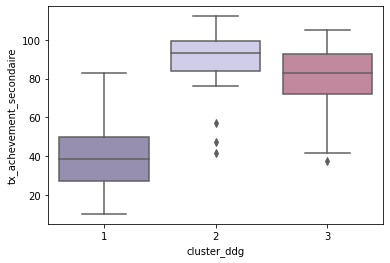

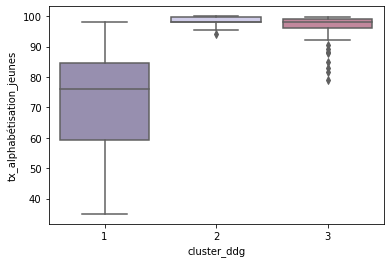

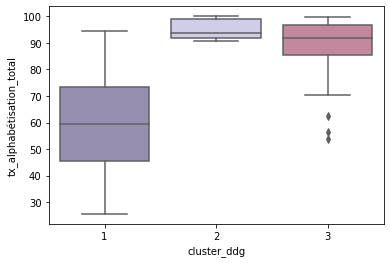

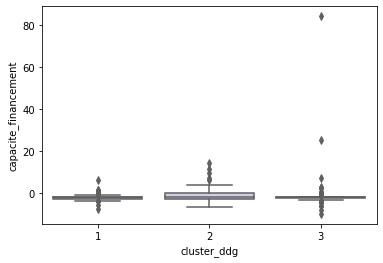

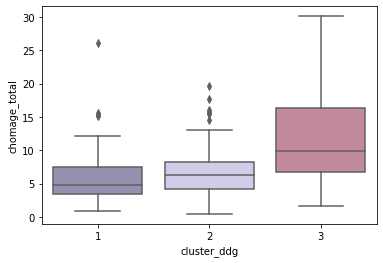

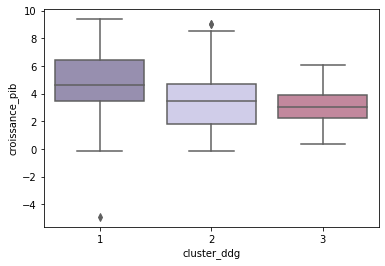

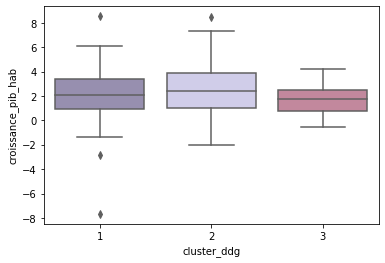

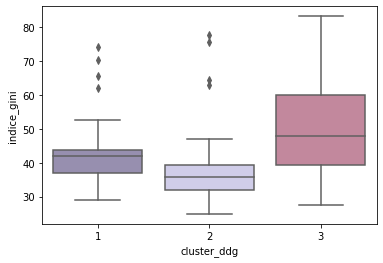

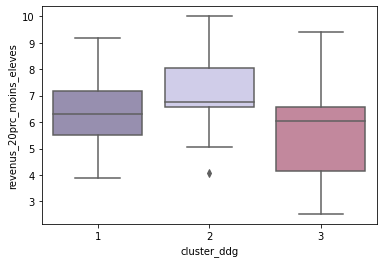

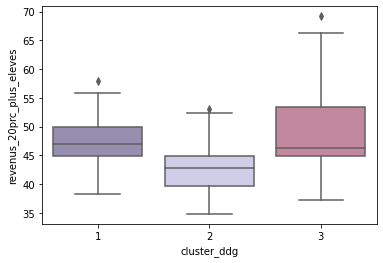

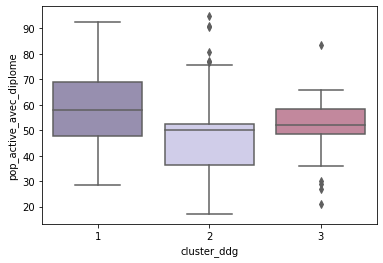

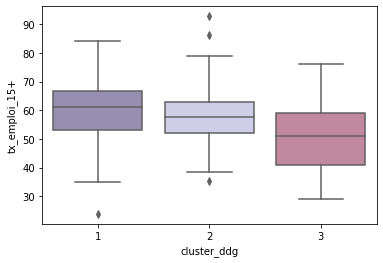

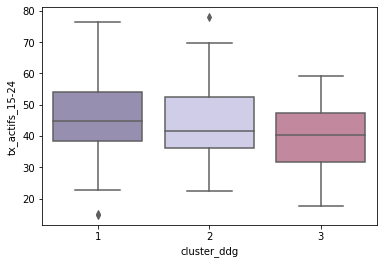

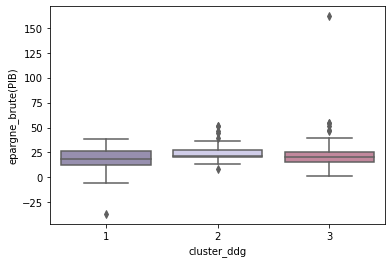

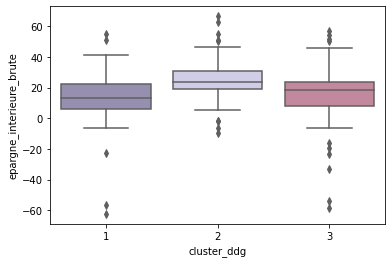

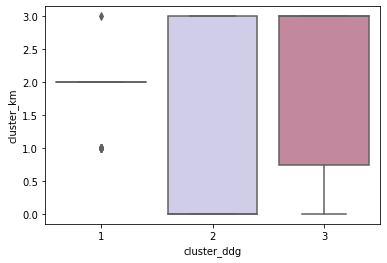

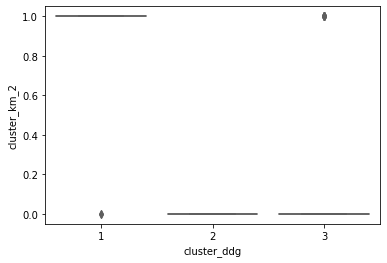

In [29]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_ddg', y = i, data = data)
    plt.show()

In [30]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=0.11389436070410013, pvalue=0.7357532882461828)
Test de Welsch : Ttest_indResult(statistic=1.6145474762919585, pvalue=0.11368667734140539)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.420352279578186, pvalue=0.0002489089513060404)
Test de Welsch : Ttest_indResult(statistic=-5.682641001048294, pvalue=4.5392904698481394e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.785256268805048, pvalue=0.0005970167311370094)
Test de Welsch : Ttest_indResult(statistic=-4.397318929370343, pvalue=4.689200214573183e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.085428551947983, pvalue=0.043254481130241544)
Test de Welsch : Ttest_indResult(statistic=2.8964993547836504, pvalue=0.006981106140700315)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.3571075013316596, pvalue=0.24403940653124956)
Test de Welsch : Ttest_indResult(statistic=0.7604610867965981, pvalue=0

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [31]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=39.96413290655833, pvalue=2.586692101840314e-10)
Test de Welsch : Ttest_indResult(statistic=-3.905519059389437, pvalue=0.0007791470930346839)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625634e-06)
Test de Welsch : Ttest_indResult(statistic=-0.7841708151528028, pv

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [32]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Acces_ens_secondaire
Test de Bartlett : BartlettResult(statistic=58.28466671085857, pvalue=2.2680493704105466e-14)
Test de Welsch : Ttest_indResult(statistic=-7.531453349220694, pvalue=1.850232997365156e-09)
Ados_non-scol
Test de Bartlett : BartlettResult(statistic=87.83387511924614, pvalue=7.118923240985256e-21)
Test de Welsch : Ttest_indResult(statistic=9.390971154929804, pvalue=7.121160295513483e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=85.3762859448759, pvalue=2.466611018166616e-20)
Test de Welsch : Ttest_indResult(statistic=7.242418292869946, pvalue=6.459992949539747e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=37.316168747364976, pvalue=1.0044834981742543e-09)
Test de Welsch : Ttest_indResult(statistic=-10.337647721738172, pvalue=4.9579950159897717e-17)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=14.931158766300284, pvalue=0.00011150604315043825)
Test de Welsch : Ttest_indResult(statistic=-2.660595048659652, p

/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/home/cecile/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


## Analyse des groupes obtenus par DBSCAN

In [33]:
data.groupby(['cluster_db']).describe().T

cluster_db                         -1           0          1          2
acces_ens_secondaire count  51.000000  141.000000   9.000000   3.000000
                     mean   87.958663   95.043076  72.911673  88.733997
                     std    13.454826    7.320919   8.623407   0.533585
                     min    42.735290   55.812369  56.357236  88.176750
                     25%    84.754109   94.889780  71.470110  88.480865
...                               ...         ...        ...        ...
cluster_ddg          min     1.000000    1.000000   1.000000   1.000000
                     25%     1.000000    2.000000   1.000000   1.000000
                     50%     1.000000    2.000000   1.000000   1.000000
                     75%     2.000000    3.000000   1.000000   1.000000
                     max     3.000000    3.000000   1.000000   1.000000

[240 rows x 4 columns]

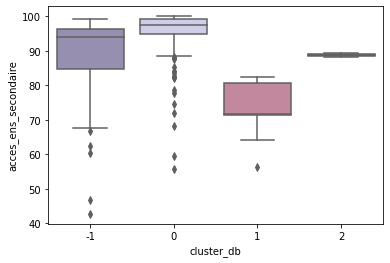

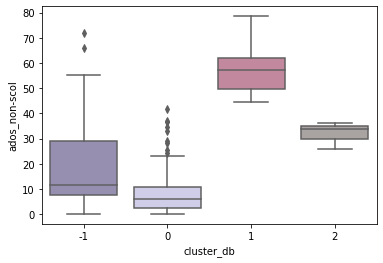

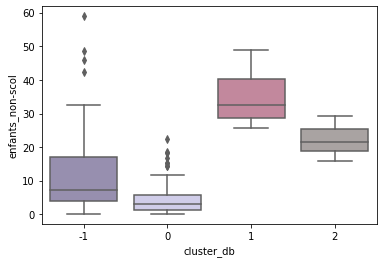

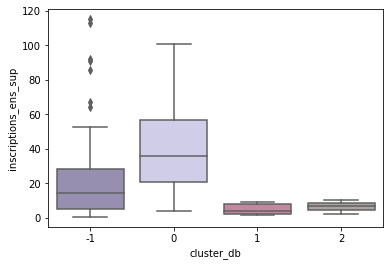

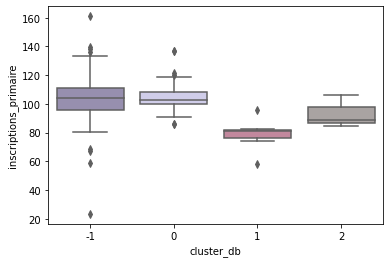

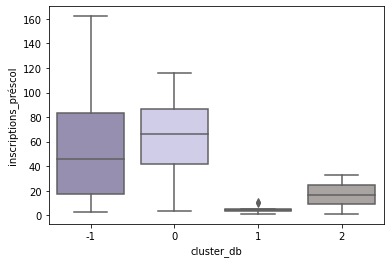

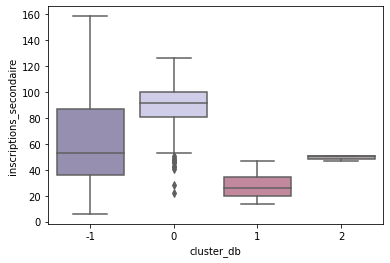

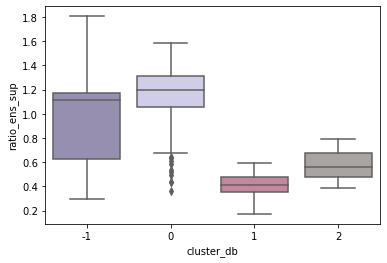

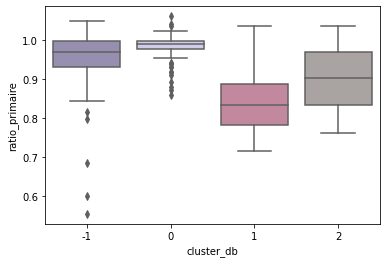

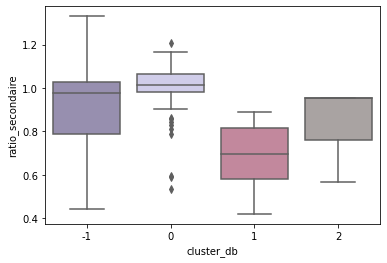

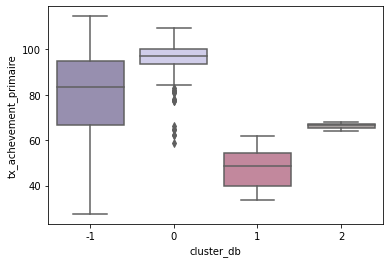

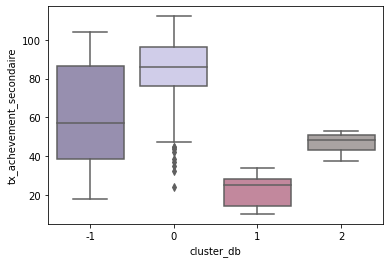

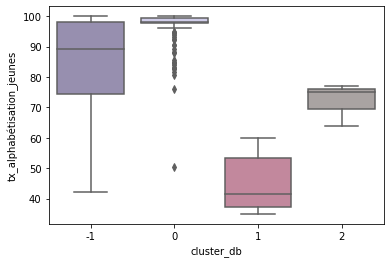

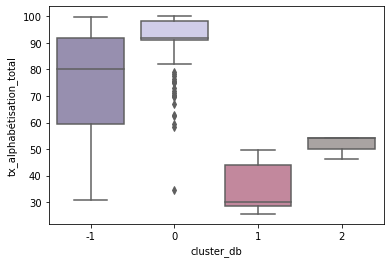

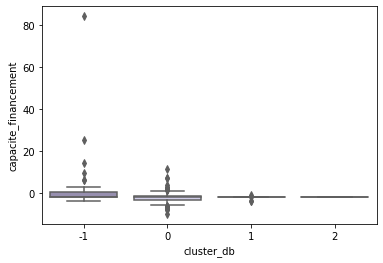

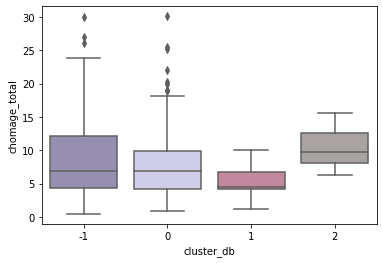

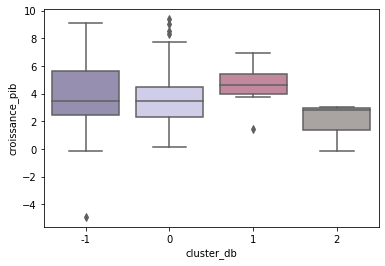

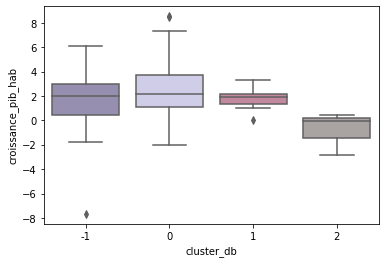

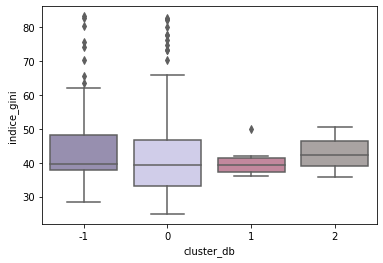

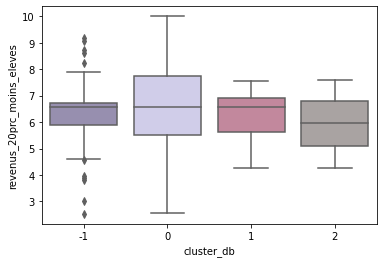

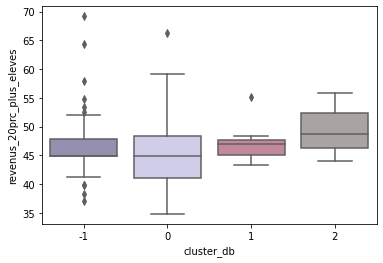

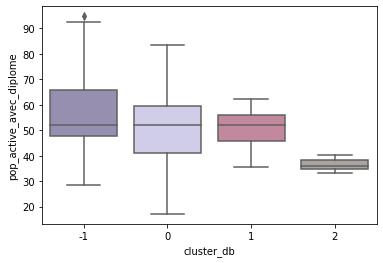

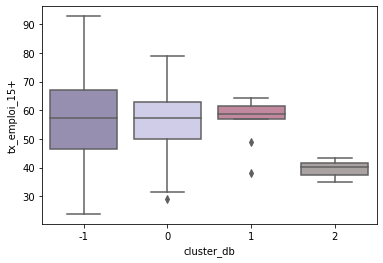

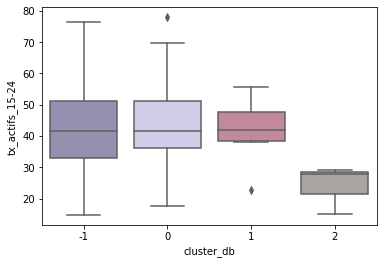

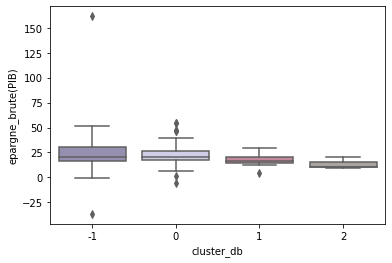

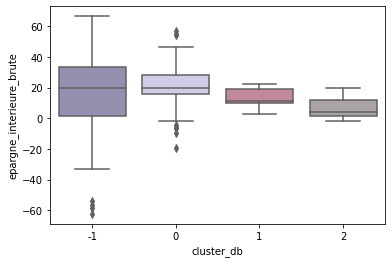

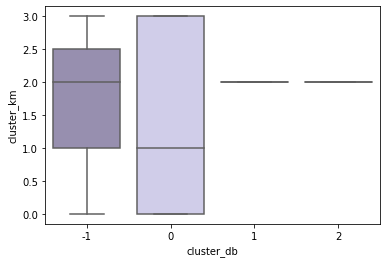

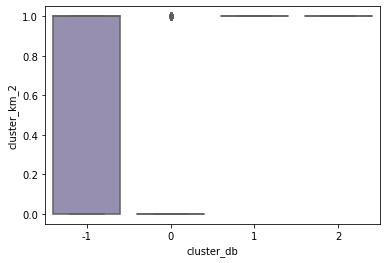

In [34]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_db', y = i, data = data)
    plt.show()